<a href="https://colab.research.google.com/github/MuyiwaOlatunji/the-ai-academy-git-and-github/blob/master/MyMLmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [3]:
import os
for dirname, _, filenames in os.walk(' /kaggle/input'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

In [1]:
!pip install -Uqq fastai "duckduckgo_search>=6.2"
from duckduckgo_search import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.6 MB/s eta 0:00:00


In [4]:
from duckduckgo_search import DDGS
from fastcore.all import *

In [6]:
def search_images(keywords, max_images = 200):
  return L(DDGS().images(keywords, max_results = max_images)).itemgot("image")

In [7]:
urls = search_images("Rabbit Photo", max_images = 1)
urls[0]

'https://images.pexels.com/photos/3828097/pexels-photo-3828097.jpeg?cs=srgb&dl=pexels-lavoni-islam-3828097.jpg&fm=jpg'

In [8]:
from fastdownload import download_url
destination = "rabbit.jpg"
download_url(urls[0], destination, show_progress = False)

Path('rabbit.jpg')

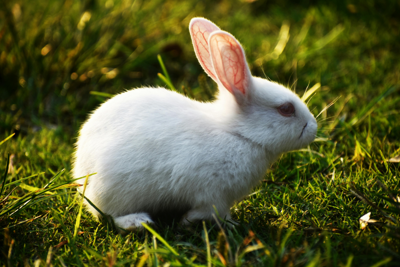

In [10]:
from fastai.vision.all import *
im = Image.open(destination)
im.to_thumb(400, 400)

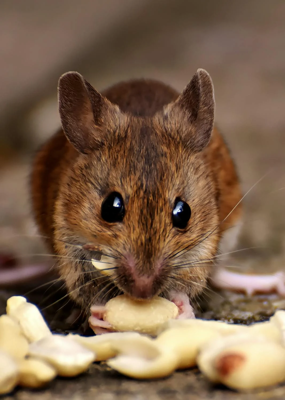

In [11]:
download_url(search_images("rat photo", max_images = 1)[0], "rat.jpg", show_progress = False)
Image.open("rat.jpg").to_thumb(400, 400)

In [22]:
searches = "rat photo", "rabbit photo"

path = Path("animal_image")

for o in searches:
  destination = (path/o)
  destination.mkdir(exist_ok = True, parents = True)
  download_images(destination, urls = search_images(f' {o} photo'))
  time.sleep(5)
  resize_images(path/o, max_size = 400, destination = path/o)

In [23]:
failed = verify_images(get_image_files(path))

failed.map(Path.unlink)
len(failed)

10

In [24]:
dls = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2, seed = 42),
    get_y = parent_label,
    item_tfms = [Resize(192, method = "squish")]
).dataloaders(path, bs = 32)


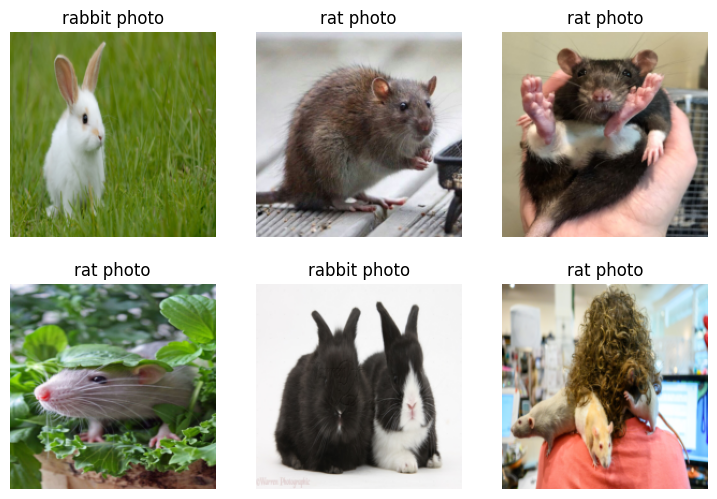

In [25]:
dls.show_batch(max_n = 6)

In [26]:
learn = vision_learner(dls, resnet18, metrics = error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 106MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.478369,0.011596,0.000000,00:54


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.058487,0.015427,0.005000,00:55
1,0.036528,0.032464,0.020000,00:54
2,0.023057,0.003285,0.000000,00:53


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in by